## 連接雲端資料夾 & 安裝套件 & 資料前處理


In [ ]:
import os

from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/Colab Notebooks') #切換該目錄
os.listdir() #確認目錄內容

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['02-pig_team_lda.ipynb',
 'Arial Unicode MS.ttf',
 'SourceHanSansTW-Regular.otf',
 'classification_with_embeddings.ipynb',
 'TaipeiSansTCBeta-Regular.ttf',
 'text_embeddings.ipynb',
 '印巴.csv',
 '俄烏-20240101-20250518.csv',
 'dict',
 'pig_team_bert.ipynb',
 'data',
 'LLM_Inference_application.ipynb',
 'Z_05-pig_team-llm.ipynb',
 '俄烏.csv',
 'lda_zh.html',
 'data.zip',
 'week12_bert.ipynb',
 'pos_table_俄烏.csv',
 'sentence_table_俄烏.csv',
 'entity_table_俄烏.csv',
 'basic_netWork.html',
 'pers_netWork.html',
 'max_sub.html',
 '03-pig_team_bert.ipynb',
 '04-pig_term_ner.ipynb',
 '05_pig_team_LLM.ipynb',
 '06-pig_Social_Media.ipynb',
 '01-pig_team.ipynb']

安裝套件

In [ ]:
!pip install ckiptagger==0.2.1
!pip install gdown==5.1.0
!pip install gensim==4.3.3
!pip install huggingface-hub==0.25.1
!pip install jieba==0.42.1
!pip install jupyter==1.1.1
!pip install keras==2.15.0
!pip install nltk==3.8.1
!pip install numpy==1.24.3
!pip install pandas==2.2.2
!pip install pyLDAvis==3.4.1
!pip install scikit-learn==1.4.0
!pip install scipy==1.12.0
!pip install seaborn==0.13.2
!pip install snownlp==0.12.3
!pip install stanza==1.10.1
!pip install tensorflow==2.15.0
!pip install textblob==0.17.0
!pip install torch==2.4.1
!pip install vaderSentiment==3.3.2
!pip install wordcloud==1.9.3
!pip install git+https://github.com/Text-Analytics-and-Retrieval/GuidedLDA.git#egg=GuidedLDA
!pip install git+https://github.com/trinker/sentimentpy
!pip install matplotlib==3.8.2

  Attempting uninstall: gdown
    Found existing installation: gdown 5.2.0
    Uninstalling gdown-5.2.0:
      Successfully uninstalled gdown-5.2.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 50.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dep

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 113.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 52.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into accoun

In [ ]:
import time
from functools import reduce
from collections import Counter
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.matutils import corpus2csc, corpus2dense, Sparse2Corpus

import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
import matplotlib
matplotlib.font_manager.fontManager.addfont('./TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms'] #使圖中中文能正常顯示

In [ ]:
udn = pd.read_csv("./俄烏.csv", encoding='utf-8')  # 匯資料
udn.head(3)

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1645663423....,[問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？,2022-02-24 08:43:41,avexgroup,Gossiping,大家好\n烏克蘭 俄羅斯戰爭一觸即發\n中華民國台灣一向很熱心想積極參與國際事務\n軍力排名...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""bumerang"", ""...",101.10.46.162,2022-02-25 00:29:48,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1645664873....,Re:[問卦]國軍如出兵烏俄戰爭可做什麼讓大家驚艷？,2022-02-24 09:07:51,BleedWang,Gossiping,怎麽支援？？\n\n中華民國國軍 可以拿來運輸的載具\n\n只有C-130 而且還是商用版 ...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""kanaptt"", ""c...",180.217.231.165,2022-02-25 00:29:54,ptt
2,3,https://www.ptt.cc/bbs/Gossiping/M.1645677360....,[問卦]共產黨會打共產黨嗎？,2022-02-24 12:35:57,Dubroy,Gossiping,假設對岸趁俄烏戰爭\n想要教訓一下美國的小弟\n這時候美國小弟跳出來說\n我跟你一樣是共產黨...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ilovemiao"", ...",101.137.223.159,2022-02-25 00:32:24,ptt


In [ ]:
# 移除網址格式
# 只留下中文字
udn["artContent"] = udn["artContent"].str.replace("(http|https)://.*", "", regex=True)
udn["artTitle"] = udn["artTitle"].str.replace("(http|https)://.*", "", regex=True)
udn["artContent"] = udn["artContent"].str.replace("[^\u4e00-\u9fa5]+", "", regex=True)
udn["artTitle"] = udn["artTitle"].str.replace("[^\u4e00-\u9fa5]+", "", regex=True)
udn['content'] = udn['artContent']
udn = udn.loc[:,["content", "artUrl", "artCatagory", 'artDate']]  # 文章內容 文章連結
udn.head(3)

,content,artUrl,artCatagory,artDate
0,大家好烏克蘭俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第維基...,https://www.ptt.cc/bbs/Gossiping/M.1645663423....,Gossiping,2022-02-24 08:43:41
1,怎麽支援中華民國國軍可以拿來運輸的載具只有而且還是商用版沒有任何自衛裝置飛到三寶顏附近隨便一...,https://www.ptt.cc/bbs/Gossiping/M.1645664873....,Gossiping,2022-02-24 09:07:51
2,假設對岸趁俄烏戰爭想要教訓一下美國的小弟這時候美國小弟跳出來說我跟你一樣是共產黨啊自己人不打...,https://www.ptt.cc/bbs/Gossiping/M.1645677360....,Gossiping,2022-02-24 12:35:57


In [ ]:
udn.dropna(inplace=True)

# 刪除 Series 中包含空值的行
udn["content"].dropna(inplace=True)

In [ ]:
# 設定繁體中文詞庫
jieba.set_dictionary("./dict/dict.txt.big")

# 新增stopwords
# jieba.analyse.set_stop_words('./dict/stopwords.txt') #jieba.analyse.extract_tags才會作用
with open("./dict/stop_words.txt", encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

# 設定斷詞 function
def getToken(row):
    seg_list = jieba.cut(row, cut_all=False)
    seg_list = [
        w for w in seg_list if w not in stopWords and len(w) > 1
    ]  # 篩選掉停用字與字元數大於1的詞彙
    return seg_list

udn["words"] = udn["content"].apply(getToken)
udn.head()

Building prefix dict from /content/drive/MyDrive/Colab Notebooks/dict/dict.txt.big ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/Colab Notebooks/dict/dict.txt.big ...
Dumping model to file cache /tmp/jieba.u7a94a31ea58ab499f6499a9111f5ea00.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.u7a94a31ea58ab499f6499a9111f5ea00.cache
Loading model cost 1.705 seconds.
DEBUG:jieba:Loading model cost 1.705 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


,content,artUrl,artCatagory,artDate,words
0,大家好烏克蘭俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第維基...,https://www.ptt.cc/bbs/Gossiping/M.1645663423....,Gossiping,2022-02-24 08:43:41,"[烏克蘭, 俄羅斯, 戰爭, 一觸即發, 中華民國, 台灣, 一向, 熱心, 積極參與, 國..."
1,怎麽支援中華民國國軍可以拿來運輸的載具只有而且還是商用版沒有任何自衛裝置飛到三寶顏附近隨便一...,https://www.ptt.cc/bbs/Gossiping/M.1645664873....,Gossiping,2022-02-24 09:07:51,"[支援, 中華民國, 國軍, 拿來, 運輸, 載具, 商用, 自衛, 裝置, 三寶顏, 附近..."
2,假設對岸趁俄烏戰爭想要教訓一下美國的小弟這時候美國小弟跳出來說我跟你一樣是共產黨啊自己人不打...,https://www.ptt.cc/bbs/Gossiping/M.1645677360....,Gossiping,2022-02-24 12:35:57,"[假設, 對岸, 戰爭, 想要, 教訓, 一下, 美國, 小弟, 這時候, 美國, 小弟, ..."
3,打仗不好會死人希望儘快結束希望越慘越好血流成河更爽最好變成三戰反正看戲不怕台高日子那麼無聊有...,https://www.ptt.cc/bbs/Gossiping/M.1645677956....,Gossiping,2022-02-24 12:45:53,"[打仗, 不好, 希望, 結束, 希望, 慘越, 血流成河, 更爽, 最好, 變成, 三戰,..."
4,看板上一堆人在討論烏俄戰爭即將爆發八成都是腦補城市陷入煉獄火焰之中吧然後城市被打得稀巴爛事實...,https://www.ptt.cc/bbs/Gossiping/M.1645678395....,Gossiping,2022-02-24 12:53:12,"[看板, 一堆, 討論, 烏俄, 戰爭, 爆發, 腦補, 城市, 陷入, 煉獄, 火焰, 之..."


## 8.1 LDA 主題模型

In [ ]:
docs = udn['words'].to_list()
docs[0]

['烏克蘭',
 '俄羅斯',
 '戰爭',
 '一觸即發',
 '中華民國',
 '台灣',
 '一向',
 '熱心',
 '積極參與',
 '國際事務',
 '軍力',
 '排名',
 '全球',
 '維基百科',
 '資料',
 '趁現',
 '機會',
 '練練手',
 '敵國',
 '知道',
 '台灣人',
 '厲害',
 '戰備',
 '整備',
 '準備',
 '支援',
 '烏俄',
 '戰爭',
 '本蛇',
 '想問',
 '國軍',
 '戰爭',
 '現場',
 '做些',
 '事情',
 '驚艷']

In [ ]:
dictionary = Dictionary(docs)
# Filter out words that occur less than 5 documents, or more than 99% of the documents.
dictionary.filter_extremes(no_below=5, no_above=0.99)
print(dictionary)

Dictionary<29881 unique tokens: ['一向', '一觸即發', '中華民國', '事情', '俄羅斯']...>


所有辭彙都有不同的id


In [ ]:
for idx, (k, v) in enumerate(dictionary.token2id.items()):
    print(f"{k}: {v}")
    if idx > 10:
        break

一向: 0
一觸即發: 1
中華民國: 2
事情: 3
俄羅斯: 4
做些: 5
全球: 6
厲害: 7
台灣: 8
台灣人: 9
國軍: 10
國際事務: 11


將斷詞結果建構語料庫(corpus)之後，利用語料庫把每篇文章數字化

In [ ]:
pprint(" ".join(udn['words'].iloc[600]))

('戰爭 之前 烏克蘭 一向 偏袒 中國 武器 技術 承認 世界 中國 俄國 之後 發現 中國 真面目 沒想到 中國 肖想 烏克蘭 女性 粉紅 支持 俄國 '
 '暴打 烏克蘭 今天 烏克蘭人 收到 物資 之後 應該 認清 朋友 真正 文明 中國 世界 唯一 台灣')


計算文章中不同id的詞彙出現幾次


In [ ]:
dictionary.doc2bow(udn['words'].iloc[600])[:10]

[(0, 1),
 (8, 1),
 (14, 1),
 (22, 3),
 (107, 1),
 (142, 5),
 (159, 1),
 (168, 1),
 (194, 1),
 (254, 1)]

詞彙id和詞彙次數列表即為主題模型的input，拿到此列表後即可訓練主題模型

In [ ]:
# 用 gensim ldamodel input 需要將文章轉換成 bag of words
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [ ]:
type(corpus)

list

**更改iterations和passes參數來增加模型更新和遍歷的次數，利用模型生成10主題數**

In [ ]:
ldamodel = LdaModel(
    corpus=corpus,
    id2word=dictionary, # 字典
    num_topics=10, # 生成幾個主題數
    random_state=2024, # 亂數
    iterations=1000,
    passes=15
)

## 8.2 查看 LDA 主題代表字


**查看LDA主題代表字的訓練結果(數字越大、比例越大，在此篇文章的重要性就越高)**

In [ ]:
ldamodel.print_topics()

[(0,
  '0.013*"老師" + 0.012*"罷免" + 0.011*"立委" + 0.010*"事件" + 0.010*"民進黨" + 0.009*"網友" + 0.009*"學姐" + 0.009*"正欣" + 0.008*"網路" + 0.008*"預言"'),
 (1,
  '0.036*"戰爭" + 0.026*"美國" + 0.022*"烏克蘭" + 0.017*"中國" + 0.015*"現在" + 0.012*"俄羅斯" + 0.010*"台灣" + 0.008*"知道" + 0.008*"烏俄" + 0.007*"真的"'),
 (2,
  '0.017*"中國" + 0.014*"歐洲" + 0.013*"日本" + 0.012*"經濟" + 0.012*"國家" + 0.010*"俄羅斯" + 0.010*"全球" + 0.009*"美國" + 0.008*"能源" + 0.008*"德國"'),
 (3,
  '0.030*"電價" + 0.029*"台電" + 0.013*"成本" + 0.012*"政府" + 0.012*"億元" + 0.011*"虧損" + 0.009*"燃料" + 0.008*"調整" + 0.008*"表示" + 0.007*"國際"'),
 (4,
  '0.010*"律師" + 0.008*"媒體" + 0.006*"女性" + 0.006*"高中" + 0.005*"是否" + 0.005*"民眾" + 0.005*"義務役" + 0.005*"訓練" + 0.004*"學生" + 0.004*"視覺"'),
 (5,
  '0.025*"美國" + 0.019*"中國" + 0.011*"總統" + 0.011*"表示" + 0.010*"中共" + 0.009*"川普" + 0.009*"國家" + 0.008*"烏克蘭" + 0.008*"戰爭" + 0.007*"台灣"'),
 (6,
  '0.075*"台灣" + 0.013*"民進黨" + 0.010*"總統" + 0.009*"國民黨" + 0.008*"民主" + 0.008*"兩岸" + 0.008*"政府" + 0.008*"臺灣" + 0.007*"英文" + 0.006*"社會"'),
 (7,
  '0.078*"俄羅斯"

我們可以根據每個主題的詞彙分佈來猜測，該主題可能是有關什麼樣的議題：
+ 主題一: 針對台灣大罷免事件的議題
+ 主題二: 中國、美國、台灣 對烏俄戰爭的議題
+ 主題三: 歐洲經濟受到俄羅斯能源的影響
+ 主題四: 台電調整夏日電價的議題
+ 主題五: 對於女性是否服義務役兵役的議題
+ 主題六: 美國總統川普對於俄烏戰爭的看法
+ 主題七: 台灣政黨及總統對於兩岸議題的看法
+ 主題八: 俄羅斯推進烏克蘭地區的議題
+ 主題九: 對於役情過後所產生的經濟影響
+ 主題十: 俄軍對於無人機及武題的議題

使用 `get_document_topics()` 回去看每篇文章的主題分佈 (`theta`)

In [ ]:
ldamodel.get_document_topics(corpus[0])

[(1, 0.39222655), (4, 0.10593346), (5, 0.23713757), (6, 0.24698871)]

## 8.3 透過指標找出最佳主題數
+ **Pointwise Mutual Information (PMI)**

+ **perplexity**


In [ ]:
# perplexity
perplexity = ldamodel.log_perplexity(corpus)
perplexity

-8.37962644942282

In [ ]:
np.exp2(-perplexity)

333.05726679857133

In [ ]:
# npmi
NPMI_model_lda = CoherenceModel(model=ldamodel, texts=docs, coherence='c_npmi')
NPMI_lda = NPMI_model_lda.get_coherence()
print('這個主題的 PMI score: ', NPMI_lda)

這個主題的 PMI score:  0.040494751475279325


In [ ]:
NPMI_model_lda.get_coherence_per_topic()

[-0.05460528574388385,
 0.020400840974200734,
 0.048993164884361715,
 0.13869483333078944,
 -0.08184246419236274,
 0.025876077014855295,
 0.026255874550056665,
 0.13592931960829474,
 0.07203828314522456,
 0.07320687118125671]

`NPMI` 的值域是[-1,1]，-1 代表兩個字沒一起出現過，0 代表兩個字之間獨立，1 代表兩個字完全相關

**透過指標找出最佳主題數**

透過建立不同主題數的模型，並以上述所說的**判斷指標**來找出最佳的主題數。<br>
這裡我們選擇主題數 2~10 來做分析。

In [ ]:
t0 = time.time()

topic_num_list = np.arange(2,10)
result = {"topic_num":[], "perplexity":[], "pmi":[]}
model_set = dict()


for topic_num in topic_num_list:
    # perplexity
    model = LdaModel(
        corpus = corpus,
        num_topics = topic_num ,
        id2word=dictionary,
        random_state = 1500,
        passes=5 # 訓練次數
        )

    loss = model.log_perplexity(corpus)
    pmi = CoherenceModel(model=model, texts=docs, coherence='c_npmi').get_coherence()
    perplexity = np.exp(-1. * loss)

    # model_set[f'k_{topic_num}'] = model

    result['topic_num'].append(topic_num)
    result['perplexity'].append(perplexity)
    result['pmi'].append(pmi)

print(f"花費時間: {time.time() - t0} sec")


花費時間: 500.6729037761688 sec


In [ ]:
result = pd.DataFrame(result)
result

,topic_num,perplexity,pmi
0,2,4047.407686,0.004967
1,3,3618.479841,0.058508
2,4,3489.134393,0.062238
3,5,3314.072072,0.039054
4,6,3359.753013,0.046367
5,7,3383.842200,0.040144
6,8,3388.523064,0.052715
7,9,3737.686905,0.054094


<Axes: xlabel='topic_num'>

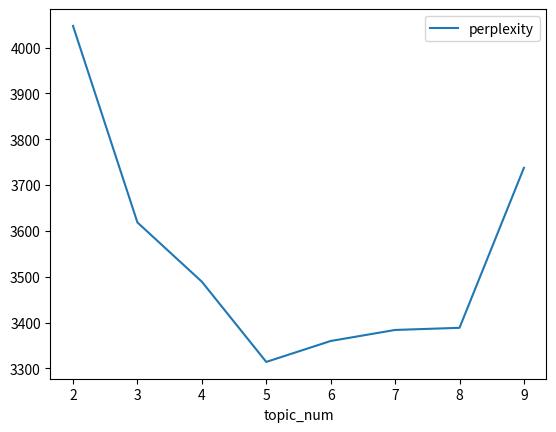

In [ ]:
result.plot.line(x='topic_num', y='perplexity')

<Axes: xlabel='topic_num'>

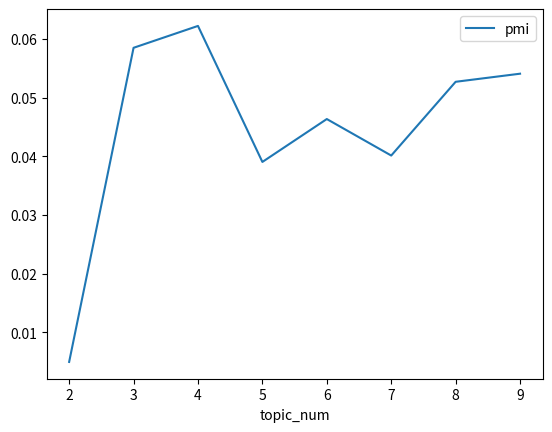

In [ ]:
result.plot.line(x='topic_num', y='pmi')

就訓練結果來看，perplexity 3,4 為最佳，coherence 最高也是3和4

## 8.4 視覺化呈現

**產生 LDAvis 結果**

用主題數 4 來做 LDAvis 的結果範例

In [ ]:
best_model = LdaModel(
    corpus = corpus,
    num_topics = 4,
    id2word=dictionary,
    random_state = 1500,
    passes = 10 # 訓練次數
    )

In [ ]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(best_model, corpus, dictionary)
p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.034796  0.080299       1        1  33.101841
1     -0.250476 -0.049325       2        1  27.339559
2      0.128477  0.166117       3        1  22.785739
3      0.156795 -0.197090       4        1  16.772861, topic_info=    Term          Freq         Total Category  logprob  loglift
4    俄羅斯  44721.000000  44721.000000  Default  30.0000  30.0000
22   烏克蘭  42409.000000  42409.000000  Default  29.0000  29.0000
121   軍隊  12949.000000  12949.000000  Default  28.0000  28.0000
142   中國  19416.000000  19416.000000  Default  27.0000  27.0000
70    美國  26121.000000  26121.000000  Default  26.0000  26.0000
..   ...           ...           ...      ...      ...      ...
14    戰爭   2214.924918  24677.403230   Topic4  -5.2551  -0.6253
552   媒體   1575.931359   6058.700337   Topic4  -5.5955   0.4388
257   指出   1493.457708   4893.167473   Topic4  -5.6492   0.5987
397   增加   1298.671344   2679.442787   Topic4  -5.7890   1.0611
941   持續   1321.591530   3850.138394   Topic4  -5.7715   0.7161

[330 rows x 6 columns], token_table=       Topic      Freq Term
term                       
61         1  0.170158   一下
61         3  0.803909   一下
61         4  0.025176   一下
11637      1  0.996947   一中
96         1  0.093461   一堆
...      ...       ...  ...
5419       3  0.945976  馬英九
5419       4  0.036027  馬英九
3546       3  0.993851   高中
3546       4  0.005869   高中
13432      3  0.998072   黑熊

[620 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

可以看到(1,3)很相近


從結果可以看到

主題一：國際觀點與國家立場（33.1%）
從代表性詞彙如「美國」、「中國」、「台灣」、「烏克蘭」、「戰爭」、「媒體」、「全球」、「國際」、「總統」等詞可看出，該主題聚焦於世界各國對俄烏戰爭的立場與評論。這包括了美中兩國的態度分析、國際媒體報導、以及與台灣自身安全環境的聯結，顯示PTT使用者高度關注戰爭在全球地緣政治中的延伸意義。

主題二：戰爭實況與軍事行動（27.3%）
此主題的關鍵詞包含「俄羅斯」、「烏軍」、「普丁」、「無人機」、「攻擊」、「飛彈」、「部隊」、「軍事」、「行動」等，顯示文本內容主要聚焦在俄烏戰爭的軍事衝突層面，包括戰事進展、戰術分析、裝備運用與領導人角色等，是整體討論中與實際戰爭情境最貼近的主題。

主題三：台灣內政與罷免政治（22.8%）
出現如「台灣」、「戰爭」、「政黨」、「民進黨」、「國民黨」、「罷免」、「民主」、「選舉」、「政府」、「立委」、「候選人」等詞彙，顯示此主題聚焦於台灣內部政治討論，特別是罷免案與政黨對立的輿論熱點。此類內容可能因戰爭話題被拿來做為政治攻防的延伸比喻或對比分析。

主題四：能源議題與電價政策（16.8%）
代表性詞語如「電價」、「台電」、「能源」、「漲價」、「天然氣」、「政府」、「成本」、「媒體」、「經濟」、「調整」等，指出該主題集中在因俄烏戰爭導致全球能源價格波動後，對台灣電價政策與能源調度所引發的討論。這顯示戰爭議題已延伸影響至日常民生層面，成為社群討論中的重要面向之一。

In [ ]:
pyLDAvis.save_html(p, "lda_zh.html")

## 8.5 主題分佈的應用，搭配其他文章資訊

In [ ]:
# 取得每條新聞的主題分佈
topics_doc = best_model.get_document_topics(corpus)

In [ ]:
topics_doc[100]

[(0, 0.9341901), (2, 0.06315939)]

In [ ]:
m_theta = corpus2csc(topics_doc).T.toarray()
m_theta

array([[0.41769323, 0.        , 0.56580126, 0.        ],
       [0.        , 0.58477992, 0.4005399 , 0.        ],
       [0.71910268, 0.01577546, 0.24934284, 0.01577906],
       ...,
       [0.86115468, 0.        , 0.133075  , 0.        ],
       [0.73614347, 0.05245212, 0.21122031, 0.        ],
       [0.96607417, 0.02813126, 0.        , 0.        ]])

In [ ]:
udn['topic_label'] = m_theta.argmax(axis=1) + 1

In [ ]:
udn['topic_label'].value_counts()

,count
topic_label,
1,5604
3,4062
4,1886
2,1270


In [ ]:
udn.head()

,content,artUrl,artCatagory,artDate,words,topic_label
0,大家好烏克蘭俄羅斯戰爭一觸即發中華民國台灣一向很熱心想積極參與國際事務軍力排名也是全球第維基...,https://www.ptt.cc/bbs/Gossiping/M.1645663423....,Gossiping,2022-02-24 08:43:41,"[烏克蘭, 俄羅斯, 戰爭, 一觸即發, 中華民國, 台灣, 一向, 熱心, 積極參與, 國...",3
1,怎麽支援中華民國國軍可以拿來運輸的載具只有而且還是商用版沒有任何自衛裝置飛到三寶顏附近隨便一...,https://www.ptt.cc/bbs/Gossiping/M.1645664873....,Gossiping,2022-02-24 09:07:51,"[支援, 中華民國, 國軍, 拿來, 運輸, 載具, 商用, 自衛, 裝置, 三寶顏, 附近...",2
2,假設對岸趁俄烏戰爭想要教訓一下美國的小弟這時候美國小弟跳出來說我跟你一樣是共產黨啊自己人不打...,https://www.ptt.cc/bbs/Gossiping/M.1645677360....,Gossiping,2022-02-24 12:35:57,"[假設, 對岸, 戰爭, 想要, 教訓, 一下, 美國, 小弟, 這時候, 美國, 小弟, ...",1
3,打仗不好會死人希望儘快結束希望越慘越好血流成河更爽最好變成三戰反正看戲不怕台高日子那麼無聊有...,https://www.ptt.cc/bbs/Gossiping/M.1645677956....,Gossiping,2022-02-24 12:45:53,"[打仗, 不好, 希望, 結束, 希望, 慘越, 血流成河, 更爽, 最好, 變成, 三戰,...",3
4,看板上一堆人在討論烏俄戰爭即將爆發八成都是腦補城市陷入煉獄火焰之中吧然後城市被打得稀巴爛事實...,https://www.ptt.cc/bbs/Gossiping/M.1645678395....,Gossiping,2022-02-24 12:53:12,"[看板, 一堆, 討論, 烏俄, 戰爭, 爆發, 腦補, 城市, 陷入, 煉獄, 火焰, 之...",2


In [ ]:
udn['artDate'] = pd.to_datetime(udn['artDate'])


In [ ]:
udn['artDate'].dt.date

,artDate
0,2022-02-24
1,2022-02-24
2,2022-02-24
3,2022-02-24
4,2022-02-24
...,...
12822,2025-05-20
12823,2025-05-20
12824,2025-05-20
12825,2025-05-21


In [ ]:
udn.groupby(udn['artDate'].dt.date)['topic_label'].value_counts(normalize=True)

artDate     topic_label
2022-02-24  1              0.445652
            3              0.434783
            2              0.065217
            4              0.054348
2022-02-25  3              0.524476
                             ...   
2025-05-20  3              0.400000
            4              0.100000
2025-05-21  1              0.666667
            3              0.166667
            4              0.166667
Name: proportion, Length: 3405, dtype: float64

In [ ]:
date_topic = udn.groupby([udn['artDate'].dt.year,udn['artDate'].dt.month])['topic_label'].value_counts(normalize=True).unstack()
date_topic.head()

topic_label             1         2         3         4
artDate artDate                                        
2022    2        0.443165  0.040288  0.473381  0.043165
        3        0.451672  0.067477  0.374468  0.106383
        4        0.423333  0.053333  0.351667  0.171667
        5        0.405325  0.062130  0.375740  0.156805
        6        0.367788  0.045673  0.269231  0.317308

**計算不同時間段的主題比率**

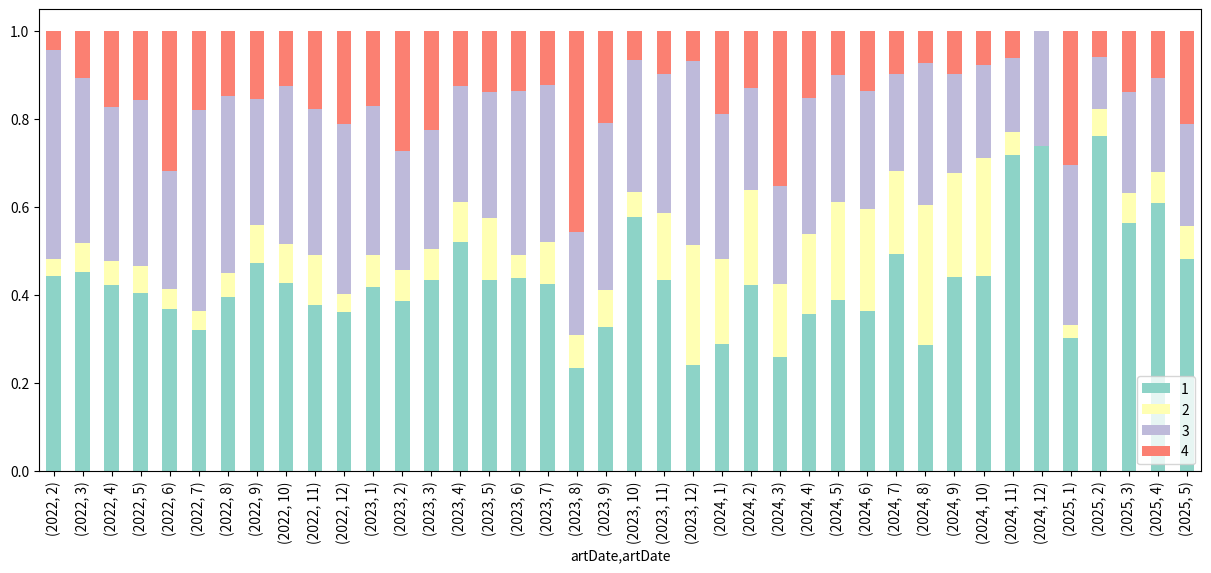

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
date_topic.plot.bar(ax=ax, stacked=True, color = plt.cm.Set3.colors)
ax.legend(loc='lower right')

主題1 針對世界各國對於烏俄戰爭的觀點<br>
主題2 可能主要在討論俄烏戰爭本身<br>
主題3 有台灣政黨，應該是針對大罷免的議題<br>
主題4 則聚焦在台電調整電價的相關議題

## **可以看到**<br>
從圖中可以發現，**主題一（國際觀點與各國立場）**在整體時序中始終佔有穩定且顯著的比例，特別是在2022至2023年間占比最高，顯示戰爭初期，使用者對美中台等國際間互動與外交立場的關注度最高。在2024年11月該主題比例突然上升，推測可能與2024年11月的美國總統大選結果出爐，川普當選有關

**主題二（戰爭實況與軍事行動）**在戰爭初期也佔據不小比例，顯示當時社群對軍事攻防、戰事進展等話題高度關注，但此主題自2024年起略呈下降趨勢。

**主題三（台灣內政與罷免政治）**的比例從2024年中期開始明顯上升，尤其在2024年6月至11月之間成為主流主題之一，推測此段期間與台灣重大政治事件（如罷免案、選舉）相關，網友對內政議題的討論熱度明顯提高。

**主題四（能源議題與電價政策）**雖整體占比相對較低，但在特定時段（如2024年初與2025年初）出現突升現象，可能與電價調整公告或能源政策相關新聞曝光有關，顯示能源議題在特定政策節點會引發集中討論。














